In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel(r"O:\iti\data preparation\tasks\task 7\population_total.xlsx")
df.describe()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,197,197,197,197,197,197,197,197,197,197,...,197,197,197,197,197,197,197,197,197,197
unique,197,164,183,186,185,179,185,180,181,180,...,191,184,190,191,192,193,191,192,189,191
top,Afghanistan,2.5M,2M,1.01M,2.01M,2.02M,2.02M,2.03M,2.03M,2.04M,...,2.18M,12.4M,17.6M,30.9M,77.6M,77.7M,46.1M,42.5M,17.4M,11M
freq,1,6,4,3,3,4,4,3,3,5,...,2,3,2,3,2,2,2,3,2,3


In [5]:
df.isnull().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64

In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
def convert(value):
    if isinstance(value, str):
        if 'M' in value:
            return int(float(value.replace('M', '')) * 1_000_000)
        elif 'k' in value:
            return int(float(value.replace('k', '')) * 1_000)
        elif 'B' in value:
            return int(float(value.replace('B', '')) * 1_000_000_000)
    return value
df.iloc[:, 1:] = df.iloc[:, 1:].applymap(convert)
print(df.head())

                country     1800     1801     1802     1803     1804     1805  \
0           Afghanistan  3280000  3280000  3280000  3280000  3280000  3280000   
1                Angola  1570000  1570000  1570000  1570000  1570000  1570000   
2               Albania   400000   402000   404000   405000   407000   409000   
3               Andorra     2650     2650     2650     2650     2650     2650   
4  United Arab Emirates    40200    40200    40200    40200    40200    40200   

      1806     1807     1808  ...       2091       2092       2093       2094  \
0  3280000  3280000  3280000  ...   76600000   76400000   76300000   76100000   
1  1570000  1570000  1570000  ...  168000000  170000000  172000000  175000000   
2   411000   413000   414000  ...    1330000    1300000    1270000    1250000   
3     2650     2650     2650  ...      63000      62900      62900      62800   
4    40200    40200    40200  ...   12300000   12400000   12500000   12500000   

        2095       2096   

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_10556\162662246.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:] = df.iloc[:, 1:].applymap(convert)


In [8]:
df= df.melt(id_vars=["country"], var_name="Year", value_name="Population")
df["Year"] =df["Year"].astype(int)
df["Population"] = pd.to_numeric(df["Population"], errors='coerce')
df.head(10)

,country,Year,Population
0,Afghanistan,1800,3280000
1,Angola,1800,1570000
2,Albania,1800,400000
3,Andorra,1800,2650
4,United Arab Emirates,1800,40200
5,Argentina,1800,534000
6,Armenia,1800,413000
7,Antigua and Barbuda,1800,37000
8,Australia,1800,200000
9,Austria,1800,3000000


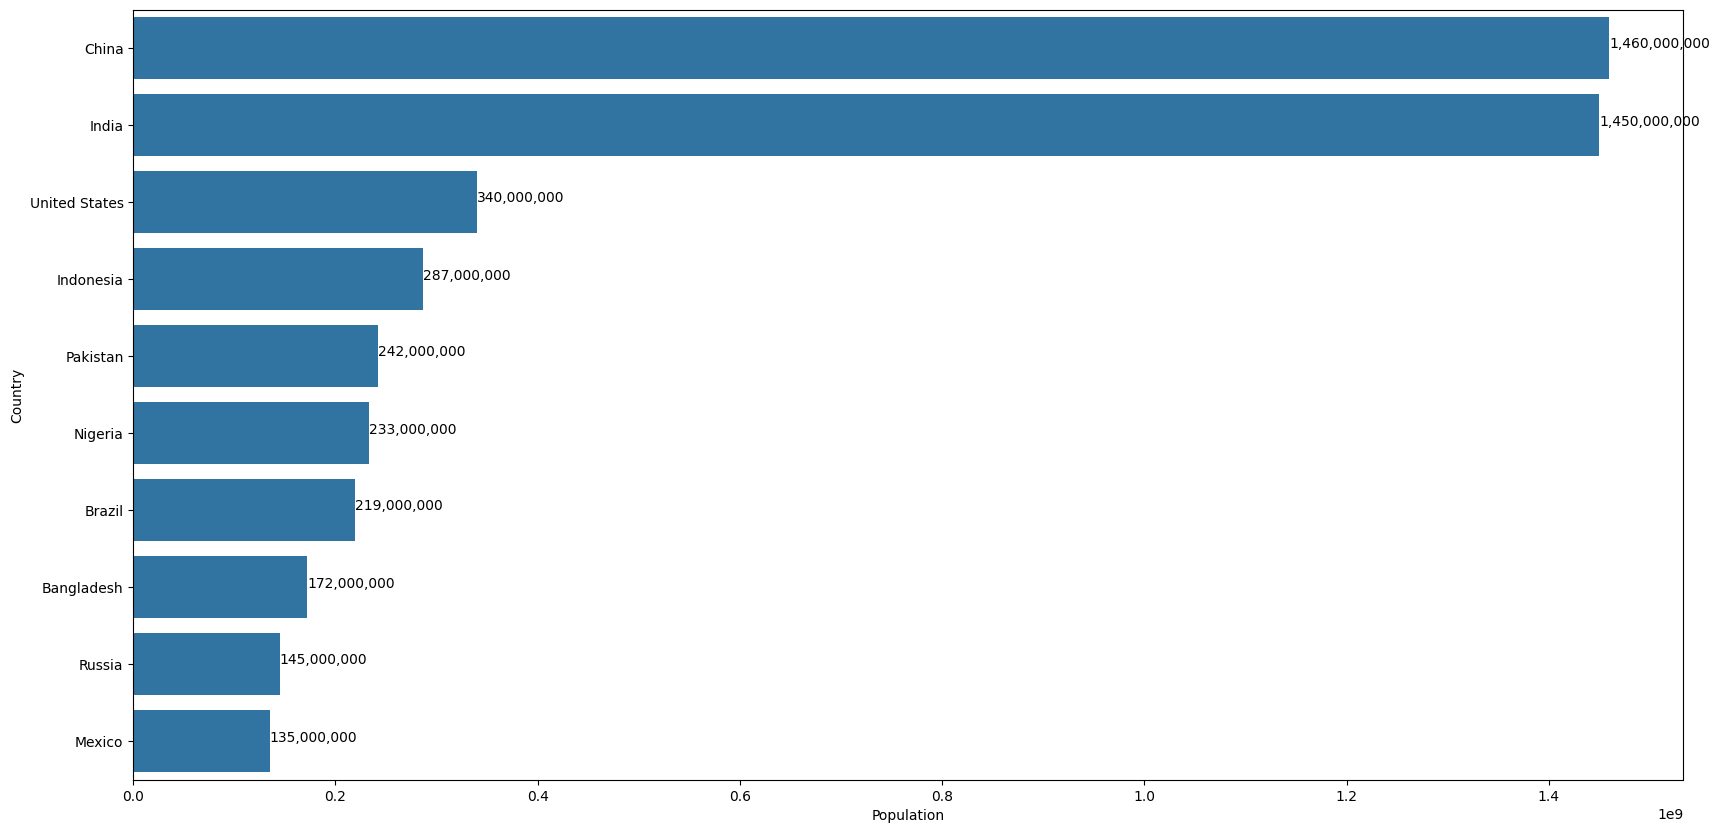

In [36]:
# Top 10 largest countries by population now
df_2025_sorted = df[df['Year'] == 2025].sort_values(by='Population', ascending=False).head(10)

plt.figure(figsize=(20, 10))
sns.barplot(data=df_2025_sorted, x='Population', y='country')
for index, value in enumerate(df_2025_sorted['Population']):
    plt.text(value, index, f'{value:,}')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

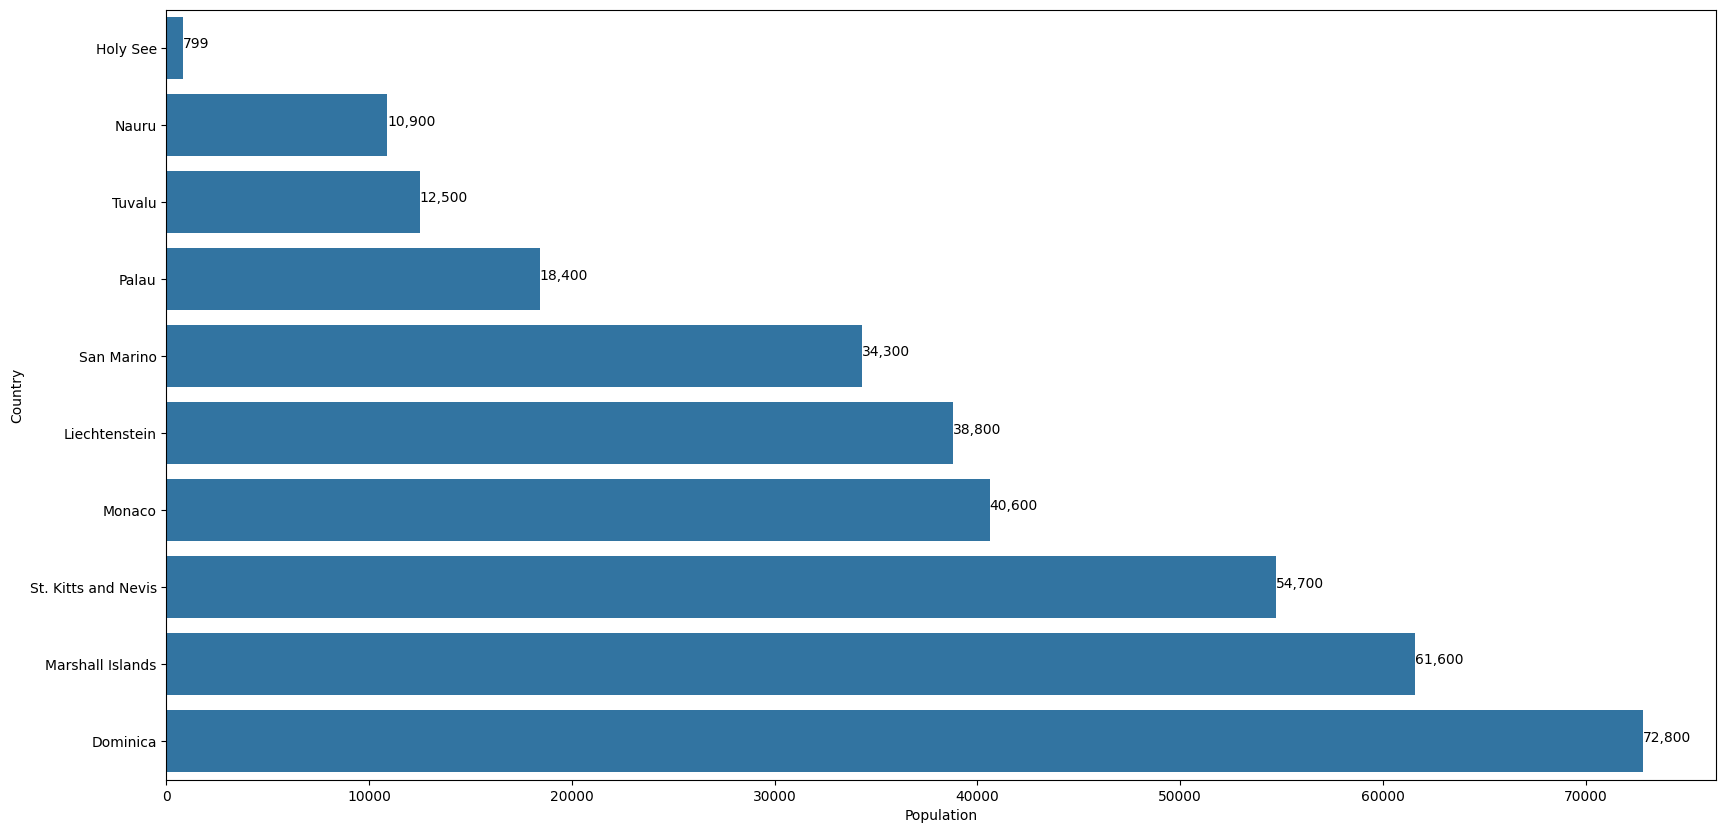

In [37]:
# Top 10 smallest countries by population now
df_2025_sorted = df[df['Year'] == 2025].sort_values(by='Population', ascending=True).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(data=df_2025_sorted, x='Population', y='country')
for index, value in enumerate(df_2025_sorted['Population']):
    plt.text(value, index, f'{value:,}')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

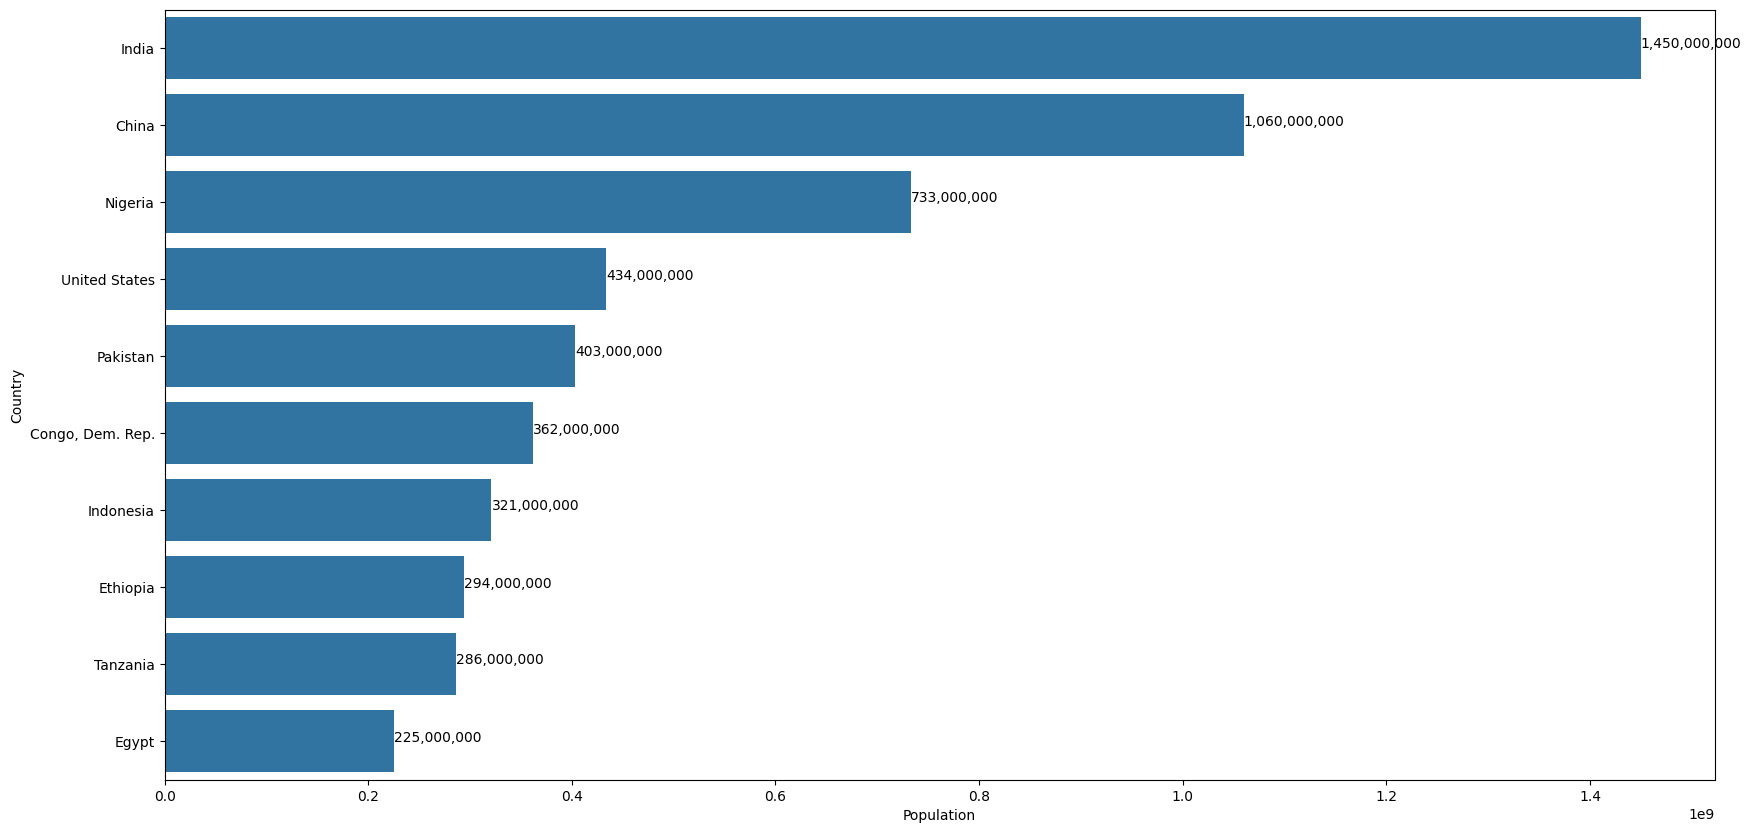

In [38]:
# Top 10 largest countries by population in 2100
df_2100_sorted = df[df['Year'] == 2100].sort_values(by='Population', ascending=False).head(10)

plt.figure(figsize=(20, 10))
sns.barplot(data=df_2100_sorted, x='Population', y='country')
for index, value in enumerate(df_2100_sorted['Population']):
    plt.text(value, index, f'{value:,}')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

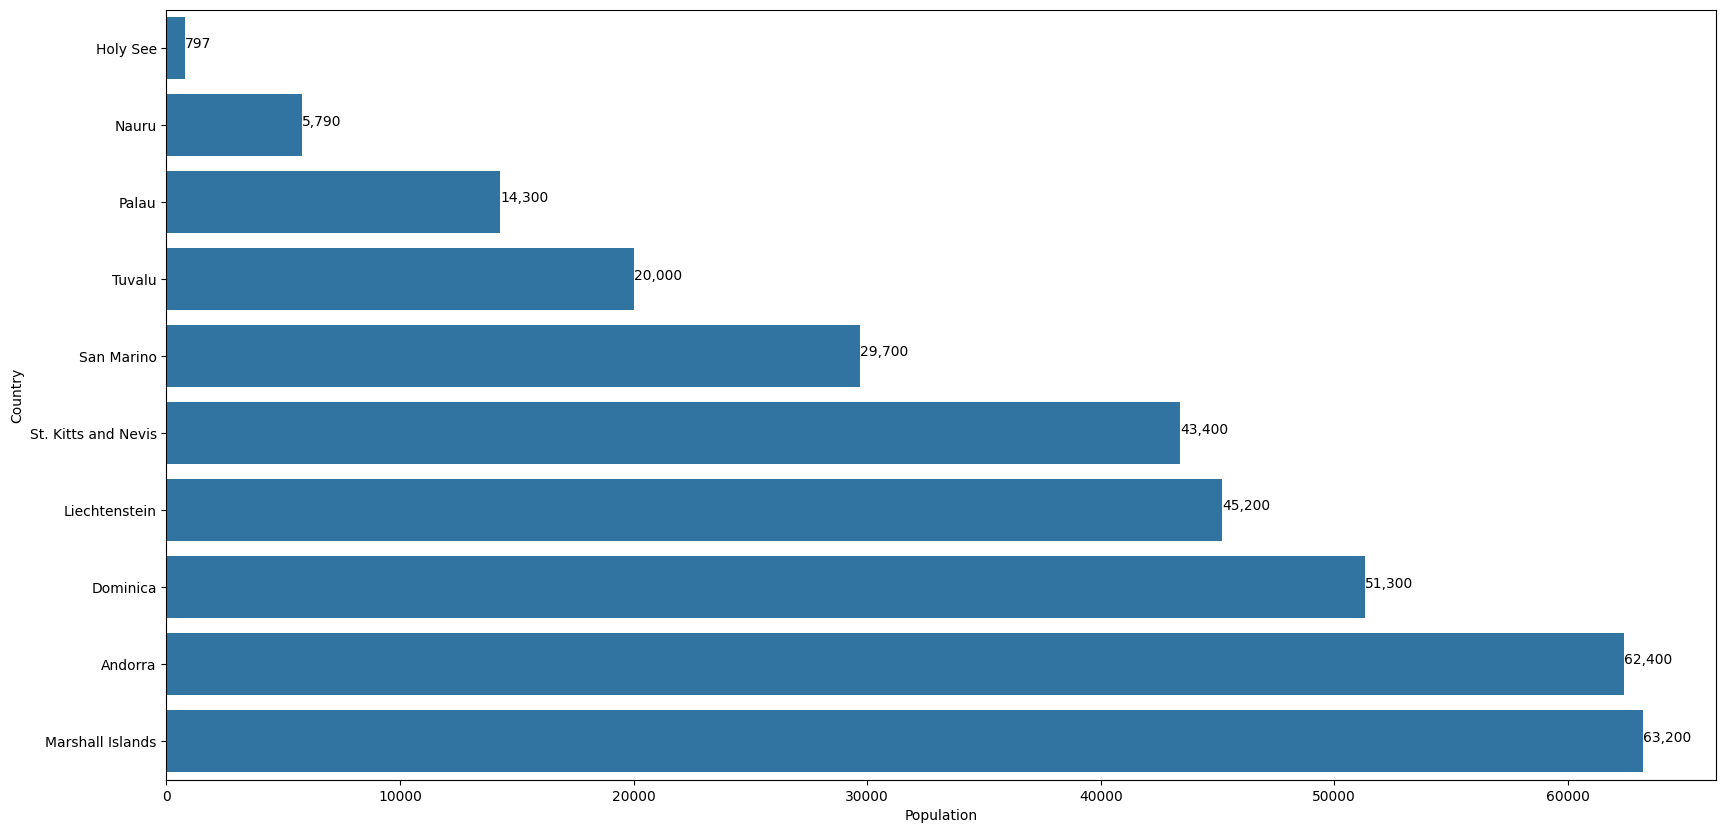

In [39]:
# Top 10 smallest countries by population in 2100
df_2100_sorted_smallest = df[df['Year'] == 2100].sort_values(by='Population', ascending=True).head(10)

plt.figure(figsize=(20, 10))
sns.barplot(data=df_2100_sorted_smallest, x='Population', y='country')
for index, value in enumerate(df_2100_sorted_smallest['Population']):
    plt.text(value, index, f'{value:,}')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

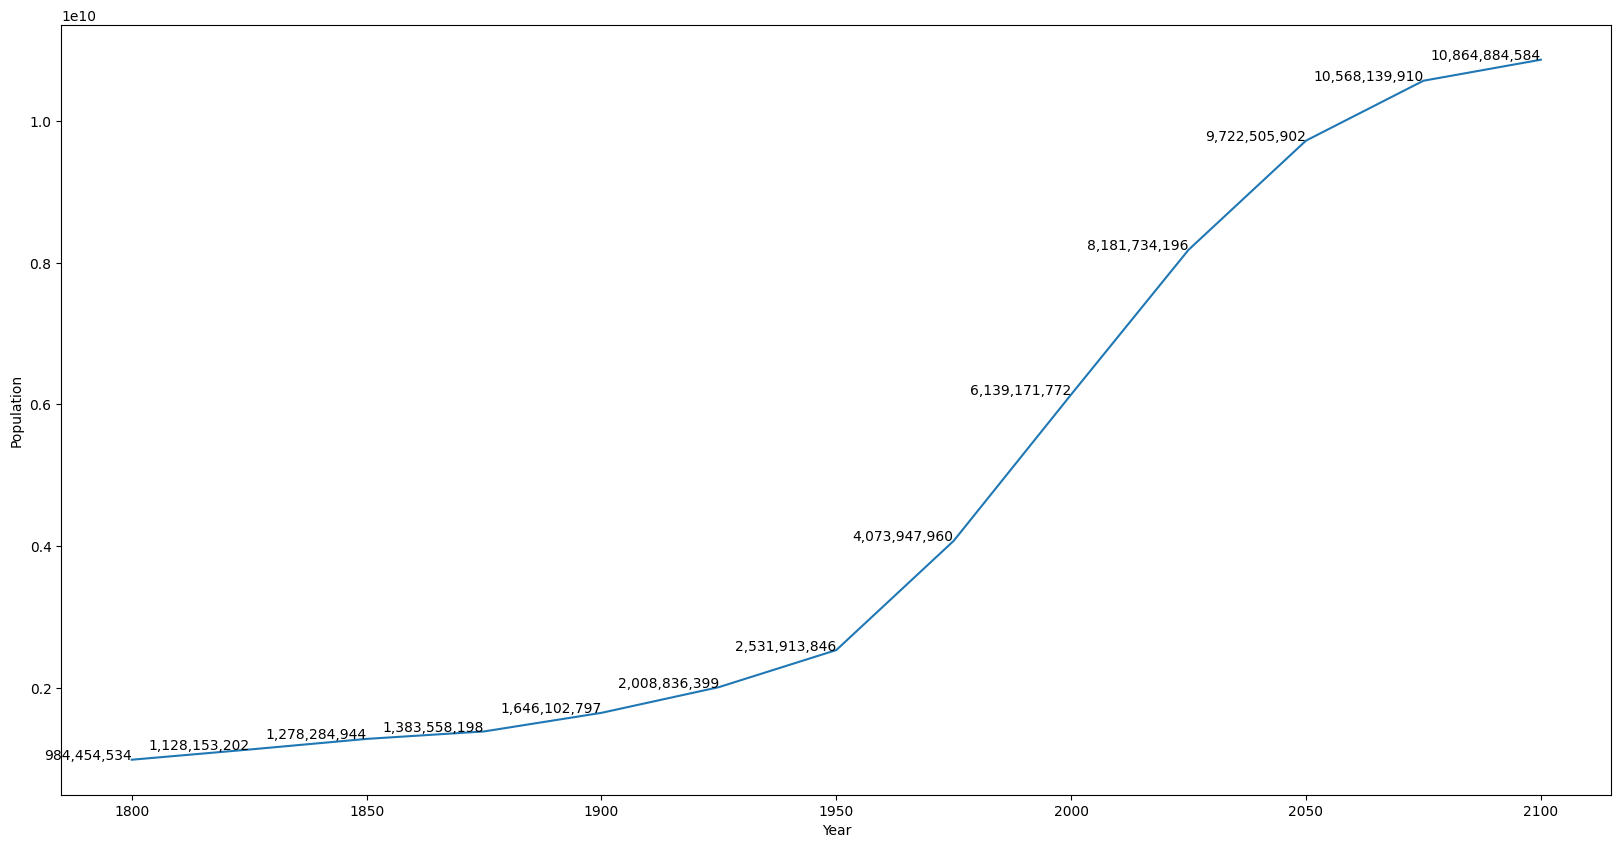

In [40]:
# world population from 1800 to 2100 every 25 years
years = list(range(1800, 2101, 25))
df_filtered = df[df['Year'].isin(years)]
world_population = df_filtered.groupby('Year')['Population'].sum().reset_index()
plt.figure(figsize=(20, 10))
sns.lineplot(data=world_population, x='Year', y='Population')
for index, row in world_population.iterrows():
    plt.text(row['Year'], row['Population'], f'{row["Population"]:,}', ha='right')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [12]:
african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 
    'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 
    'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 
    'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 
    'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 
    'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'
]

df_africa = df[df['country'].isin(african_countries)]
df_africa.head()

,country,Year,Population
1,Angola,1800,1570000
11,Burundi,1800,899000
13,Benin,1800,637000
14,Burkina Faso,1800,1670000
27,Botswana,1800,121000


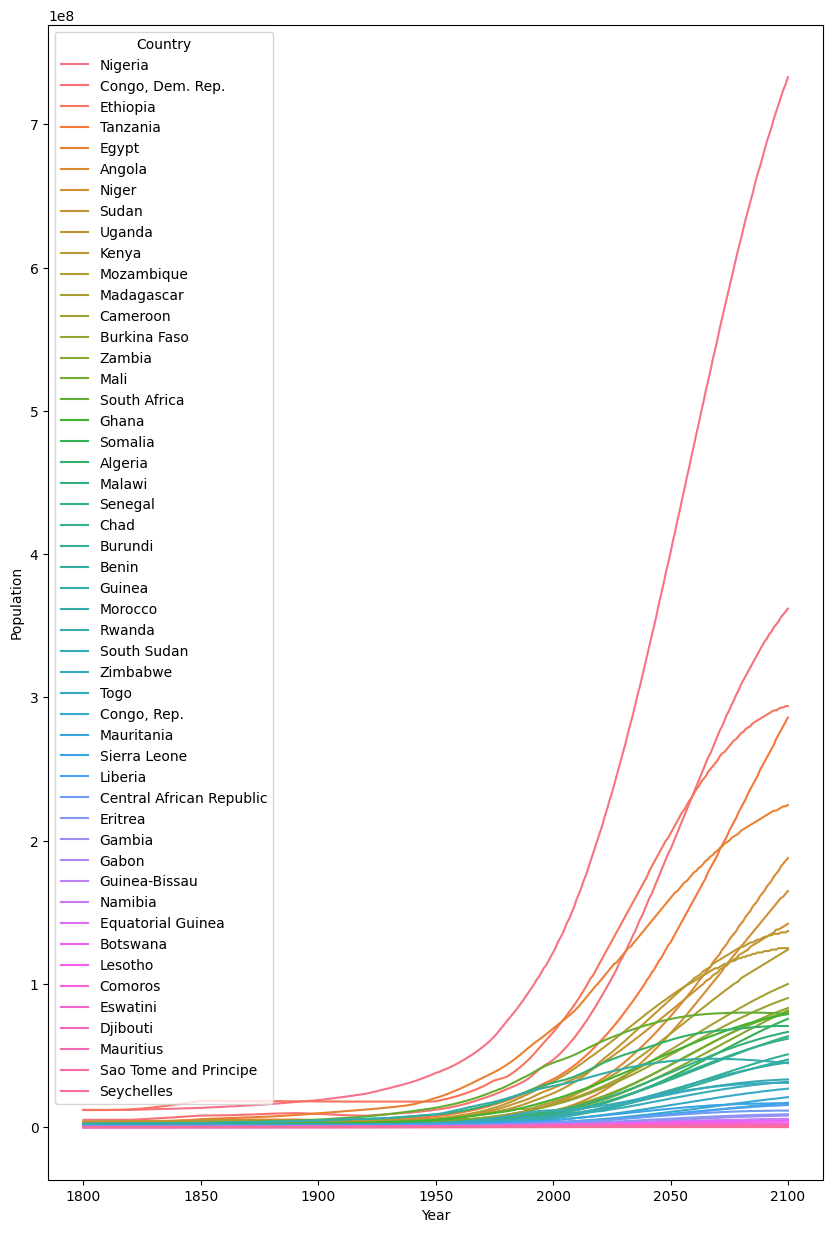

In [13]:
# largest population in Africa in 2100
df_africa_2100 = df_africa[df_africa['Year'] == 2100].sort_values(by='Population', ascending=False)
sorted_countries_africa = df_africa_2100['country'].tolist()
plt.figure(figsize=(10, 15))
sns.lineplot(data=df_africa, x='Year', y='Population', hue='country', hue_order=sorted_countries_africa)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()

In [14]:
european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 
    'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 
    'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 
    'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 
    'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 
    'United Kingdom', 'Vatican City'
]

df_europe = df[df['country'].isin(european_countries)]
df_europe.head()

,country,Year,Population
2,Albania,1800,400000
3,Andorra,1800,2650
6,Armenia,1800,413000
9,Austria,1800,3000000
10,Azerbaijan,1800,880000


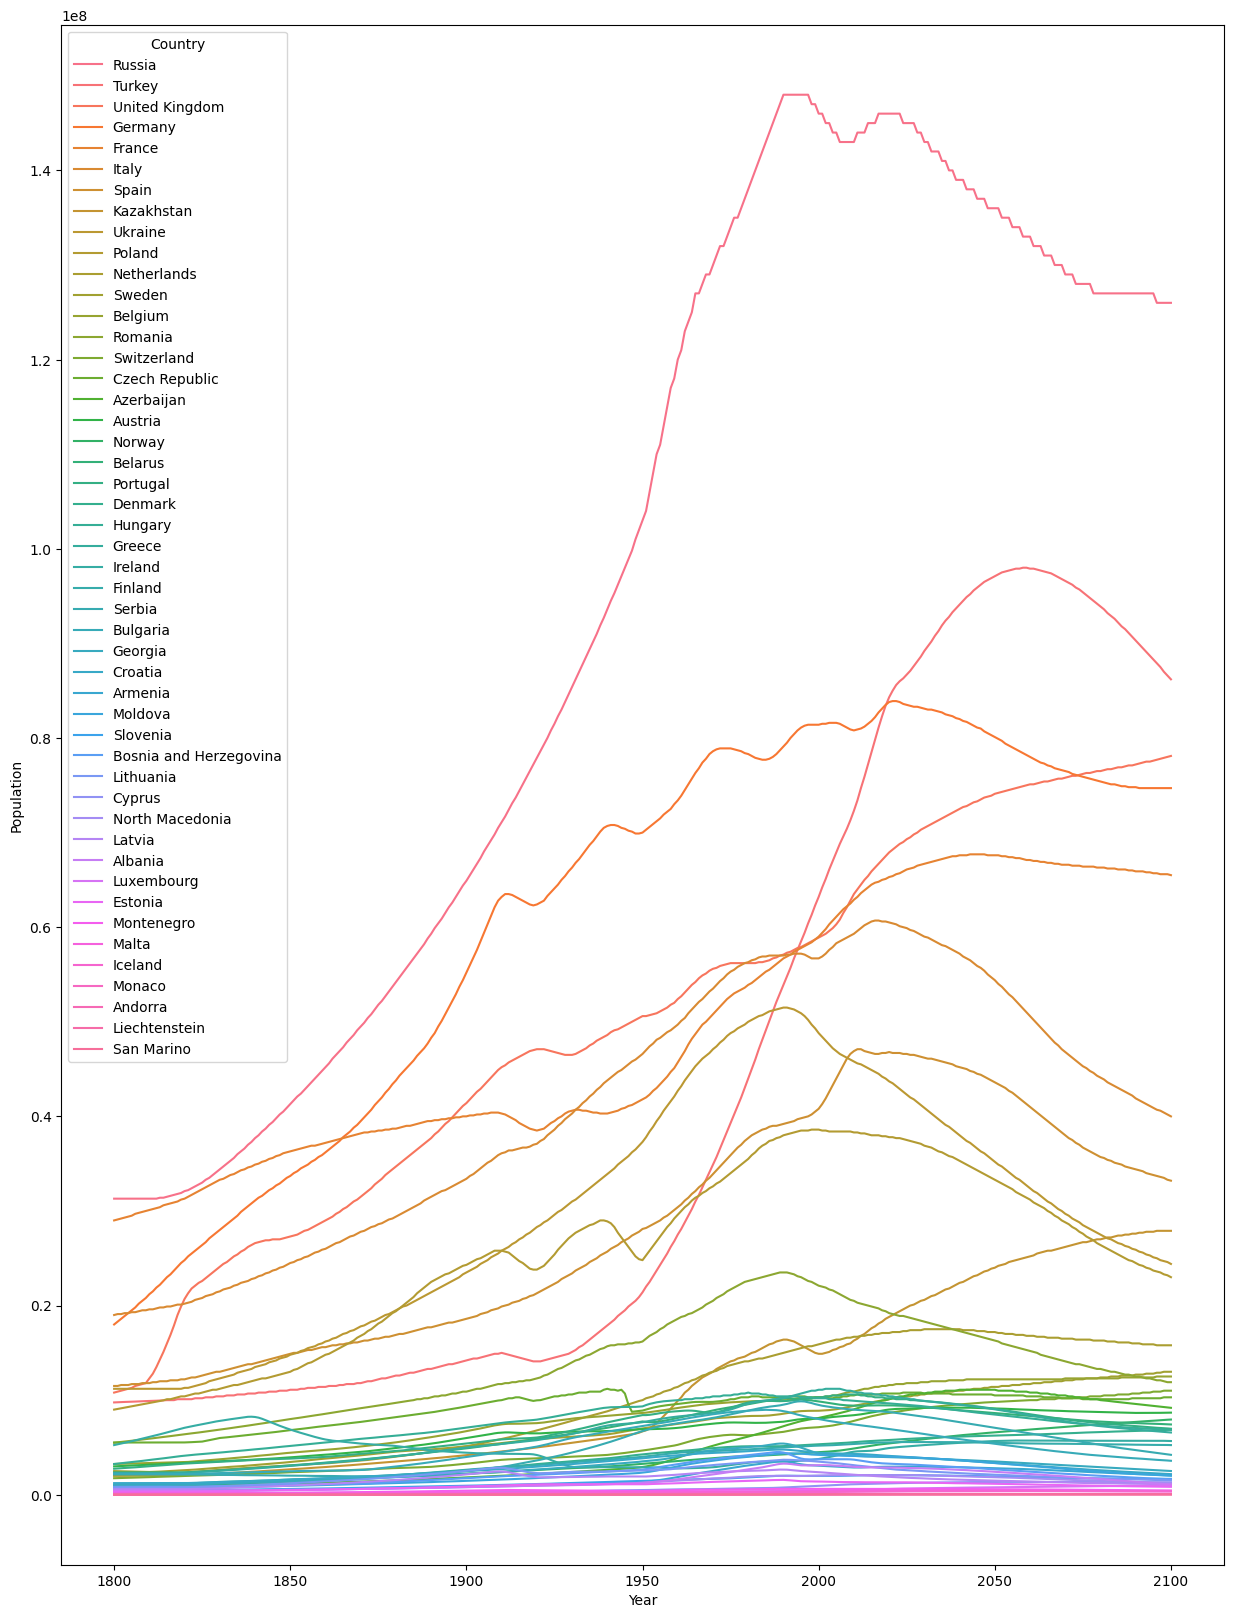

In [15]:
# largest population in Europe in 2100
df_europe_2100 = df_europe[df_europe['Year'] == 2100].sort_values(by='Population', ascending=False)
sorted_countries_europe = df_europe_2100['country'].tolist()

plt.figure(figsize=(15, 20))
sns.lineplot(data=df_europe, x='Year', y='Population', hue='country', hue_order=sorted_countries_europe)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()

In [16]:
asian_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 
    'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 
    'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 
    'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 
    'Thailand', 'Timor-Leste', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
]

df_asia = df[df['country'].isin(asian_countries)]
df_asia.head()

,country,Year,Population
0,Afghanistan,1800,3280000
4,United Arab Emirates,1800,40200
6,Armenia,1800,413000
10,Azerbaijan,1800,880000
15,Bangladesh,1800,19200000


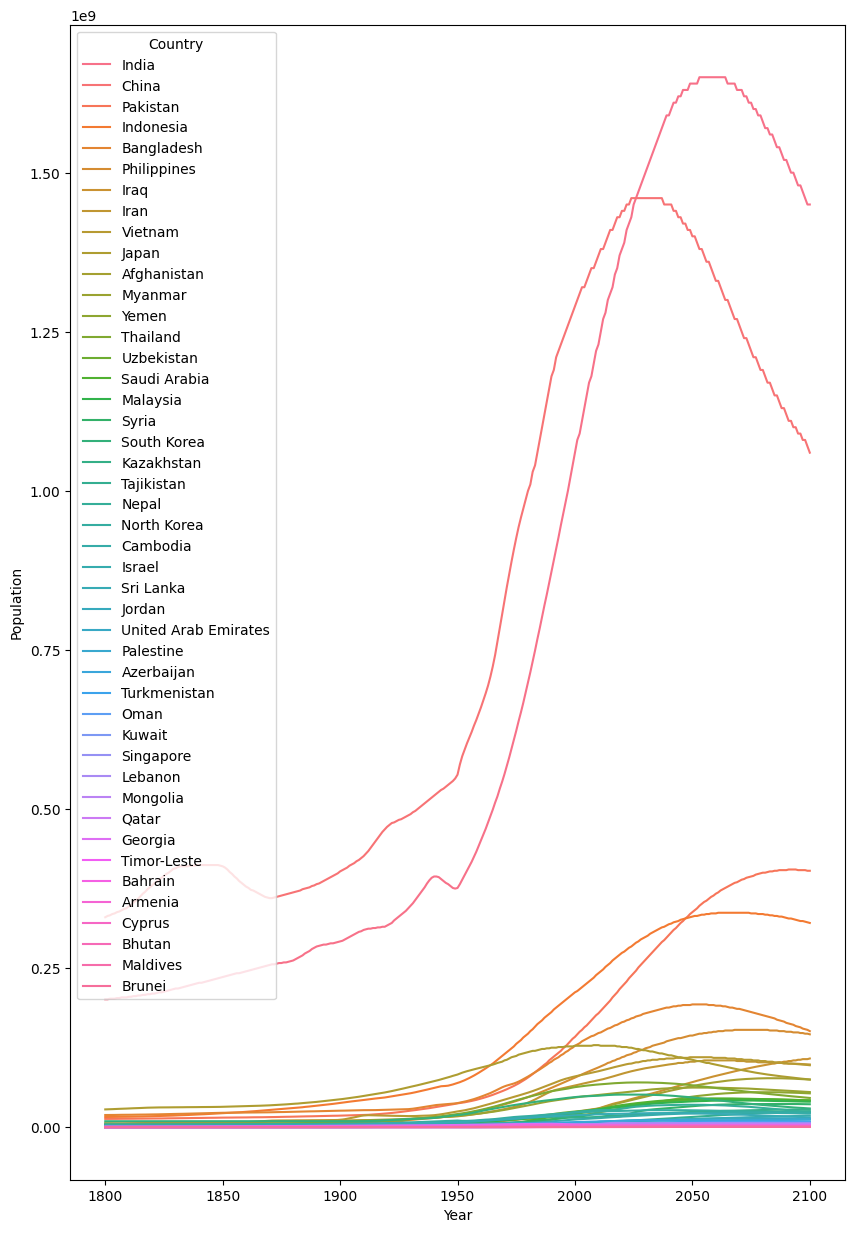

In [17]:
# largest population in asia in 2100
df_asia_2100 = df_asia[df_asia['Year'] == 2100].sort_values(by='Population', ascending=False)
sorted_countries_asia = df_asia_2100['country'].tolist()

plt.figure(figsize=(10, 15))
sns.lineplot(data=df_asia, x='Year', y='Population', hue='country', hue_order=sorted_countries_asia)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()

In [18]:
north_american_countries = [
    'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 
    'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 
    'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'
]

df_north_america = df[df['country'].isin(north_american_countries)]
df_north_america.head()

,country,Year,Population
7,Antigua and Barbuda,1800,37000
18,Bahamas,1800,27400
21,Belize,1800,25500
24,Barbados,1800,81700
29,Canada,1800,500000


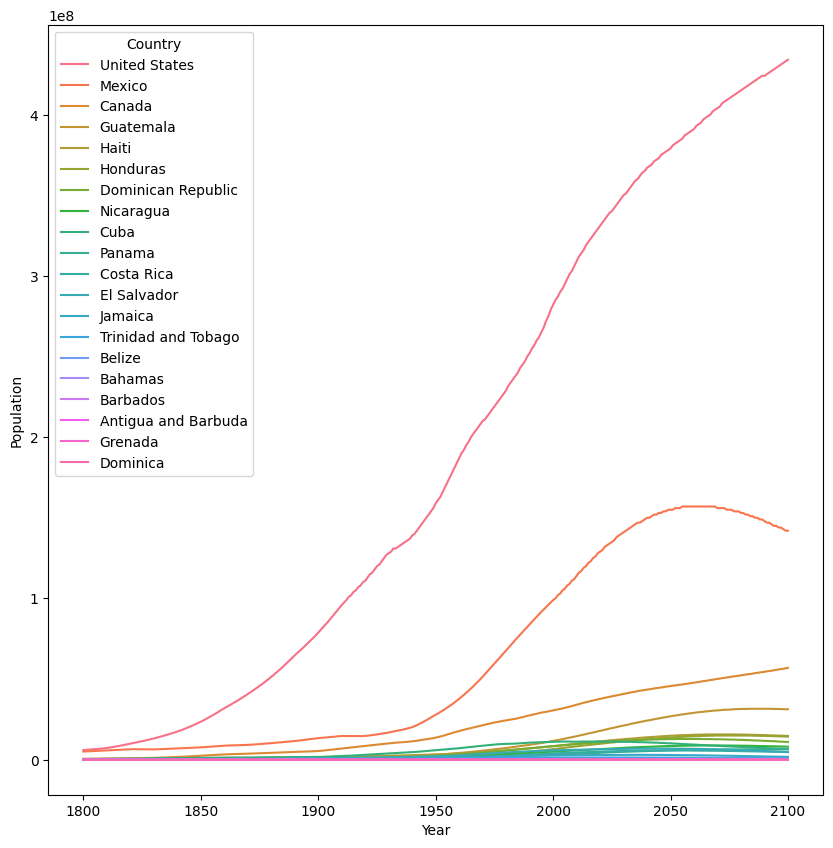

In [19]:
# largest population in north america in 2100
df_north_america_2100 = df_north_america[df_north_america['Year'] == 2100].sort_values(by='Population', ascending=False)
sorted_countries_north_america = df_north_america_2100['country'].tolist()

plt.figure(figsize=(10, 10))
sns.lineplot(data=df_north_america, x='Year', y='Population', hue='country', hue_order=sorted_countries_north_america)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()

In [20]:
south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

df_south_america = df[df['country'].isin(south_american_countries)]
df_south_america.head()

,country,Year,Population
5,Argentina,1800,534000
22,Bolivia,1800,887000
23,Brazil,1800,2500000
31,Chile,1800,771000
37,Colombia,1800,1210000


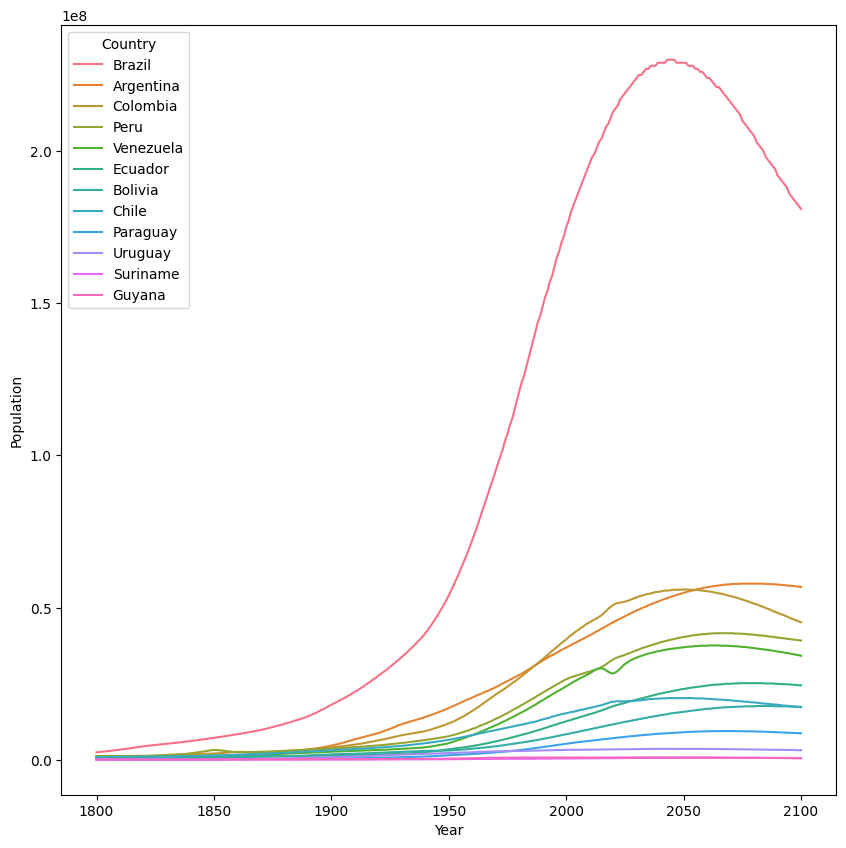

In [21]:
# largest population in south america in 2100
df_south_america_2100 =df_south_america[df_south_america['Year'] == 2100].sort_values(by='Population', ascending=False)
sorted_countries_south_america =df_south_america_2100['country'].tolist()

plt.figure(figsize=(10, 10))
sns.lineplot(data=df_south_america, x='Year', y='Population', hue='country', hue_order=sorted_countries_south_america)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()

In [22]:
australian_countries = [ 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

df_australia = df[df['country'].isin(australian_countries)]
df_australia.head()

,country,Year,Population
8,Australia,1800,200000
57,Fiji,1800,131000
93,Kiribati,1800,17900
114,Marshall Islands,1800,5830
133,Nauru,1800,1830


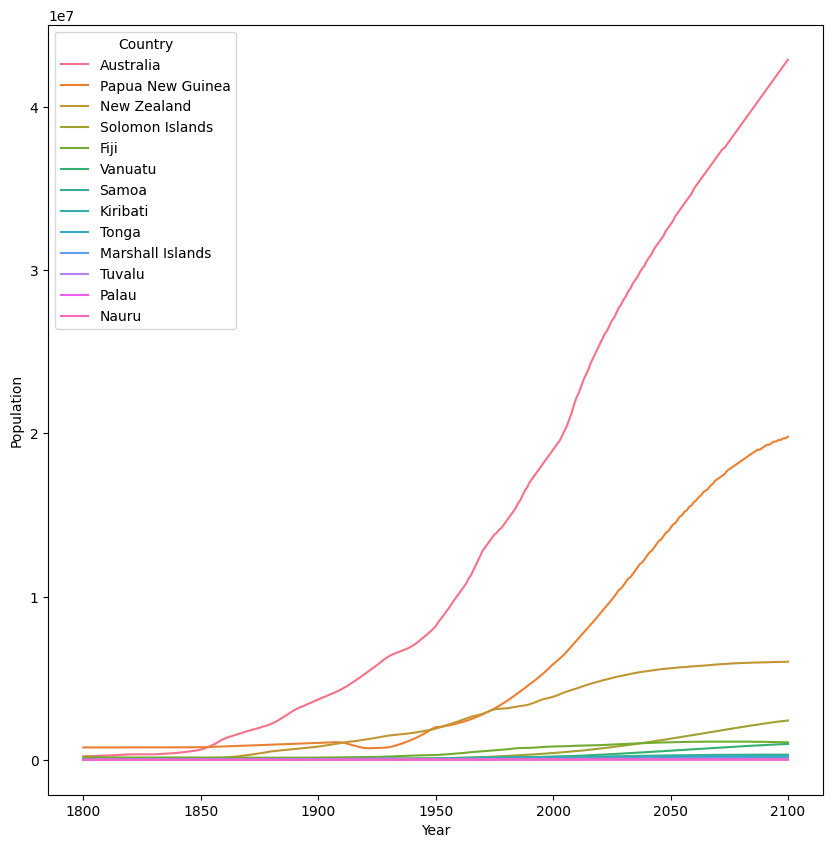

In [23]:
# largest population in australia in 2100
df_australia_2100= df_australia[df_australia['Year'] == 2100].sort_values(by='Population', ascending=False)
sorted_countries_australia = df_australia_2100['country'].tolist()

plt.figure(figsize=(10, 10))
sns.lineplot(data=df_australia, x='Year', y='Population', hue='country', hue_order=sorted_countries_australia)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()

In [30]:
arab_countries = [
    'Algeria', 'Bahrain', 'Egypt', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 
    'Morocco', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'
]

df_arab = df[df['country'].isin(arab_countries)]
df_arab.head()

,country,Year,Population
4,United Arab Emirates,1800,40200
17,Bahrain,1800,64500
49,Algeria,1800,2500000
51,Egypt,1800,3500000
82,Iraq,1800,1000000


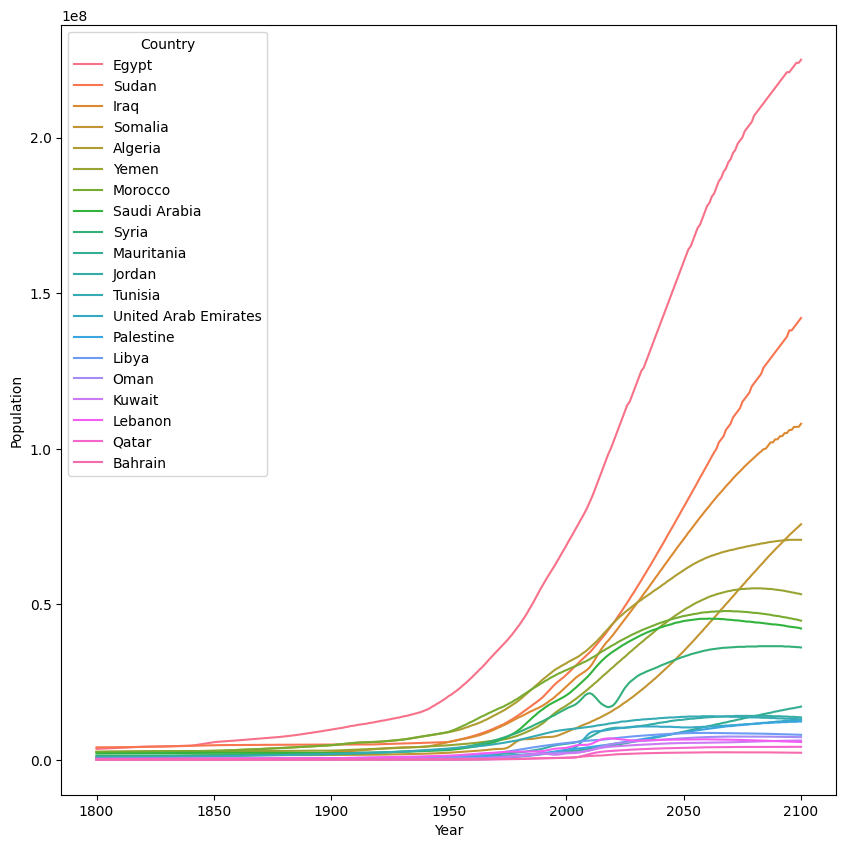

In [32]:
# largest population in arab countries in 2100
df_arab_2100 = df_arab[df_arab['Year'] == 2100].sort_values(by='Population', ascending=False)
sorted_countries_arab = df_arab_2100['country'].tolist()
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_arab, x='Year', y='Population', hue='country', hue_order=sorted_countries_arab)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()

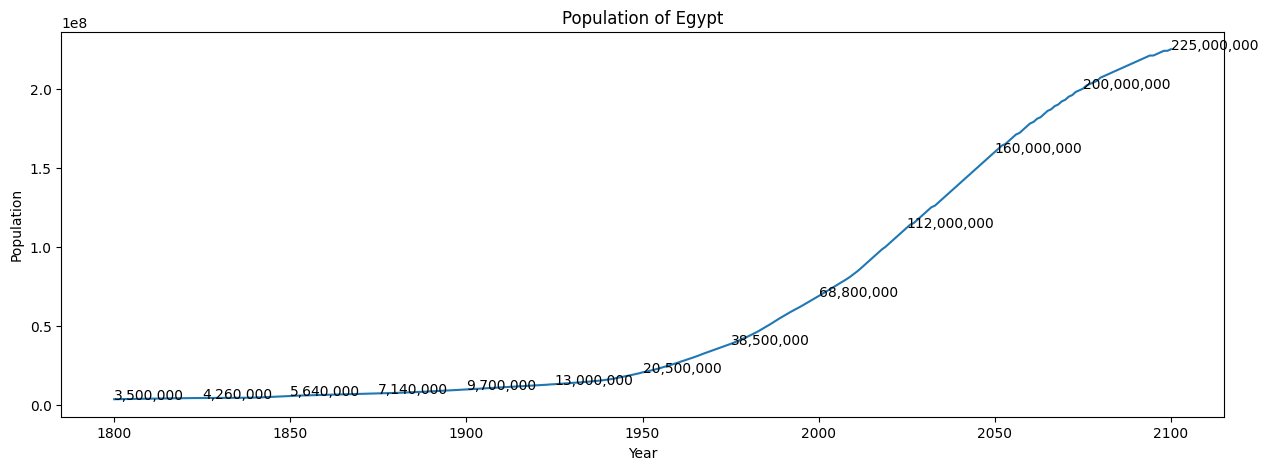

In [26]:
egypt_population = df[df['country'] == 'Egypt']

plt.figure(figsize=(15, 5))
for year in range(1800, 2101, 25):
    population = egypt_population[egypt_population['Year'] == year]['Population'].values
    plt.text(year, population[0], f'{population[0]:,}')
sns.lineplot(data=egypt_population, x='Year', y='Population')
plt.title('Population of Egypt')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()